In [2]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as transforms
import imutils

In [3]:
import motion

In [4]:
def make_video(images, outimg=None, fps=30, size=None,
               is_color=True, format="XVID"):
    """
    Create a video from a list of images.
 
    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
 
    The function relies on http://opencv-python-tutroals.readthedocs.org/en/latest/.
    By default, the video will have the size of the first image.
    It will resize every image to this size before adding them to the video.
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if type(image) == str:
            if not os.path.exists(image):
                raise FileNotFoundError(image)
            img = imread(image)
        else:
            img = image
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid

28
['output/frame_0.png', 'output/frame_1.png', 'output/frame_2.png', 'output/frame_3.png', 'output/frame_4.png', 'output/frame_5.png', 'output/frame_6.png', 'output/frame_7.png', 'output/frame_8.png', 'output/frame_9.png', 'output/frame_10.png', 'output/frame_11.png', 'output/frame_12.png', 'output/frame_13.png', 'output/frame_14.png', 'output/frame_15.png', 'output/frame_16.png', 'output/frame_17.png', 'output/frame_18.png', 'output/frame_19.png', 'output/frame_20.png', 'output/frame_21.png', 'output/frame_22.png', 'output/frame_23.png', 'output/frame_24.png', 'output/frame_25.png', 'output/frame_26.png', 'output/frame_27.png', 'output/frame_28.png', 'output/frame_29.png', 'output/frame_30.png', 'output/frame_31.png', 'output/frame_32.png', 'output/frame_33.png', 'output/frame_34.png', 'output/frame_35.png', 'output/frame_36.png', 'output/frame_37.png', 'output/frame_38.png', 'output/frame_39.png', 'output/frame_40.png', 'output/frame_41.png', 'output/frame_42.png', 'output/frame_43.

NameError: name 'os' is not defined

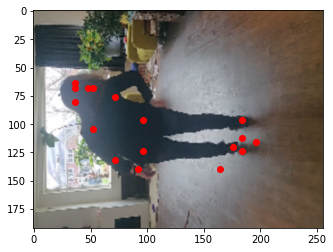

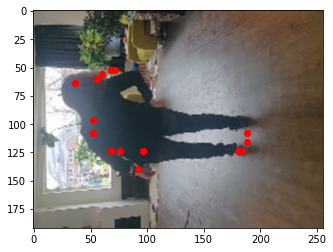

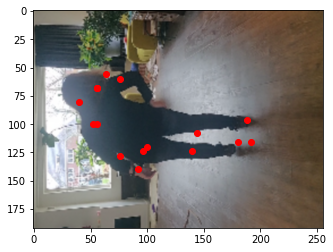

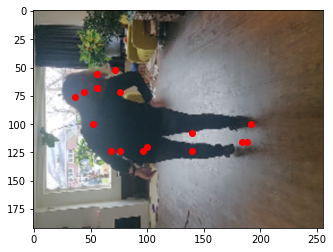

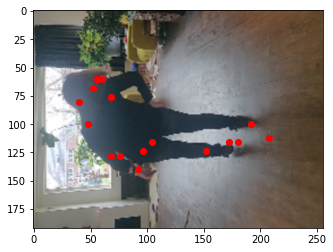

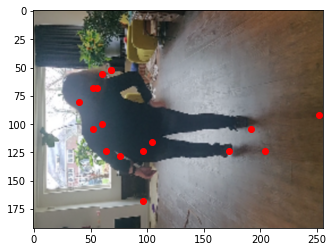

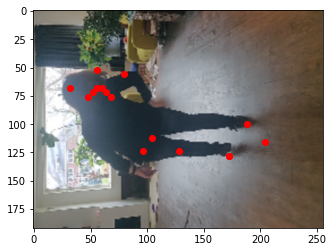

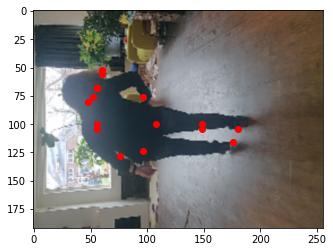

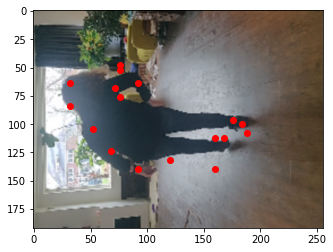

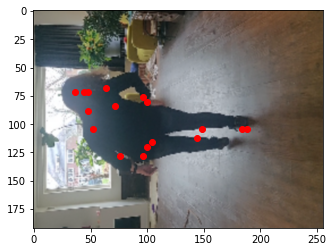

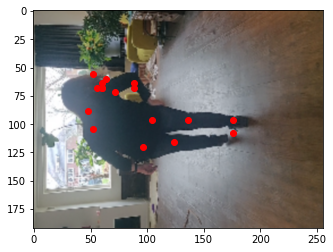

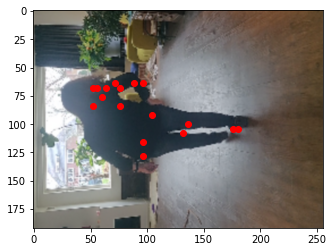

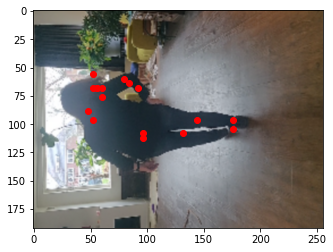

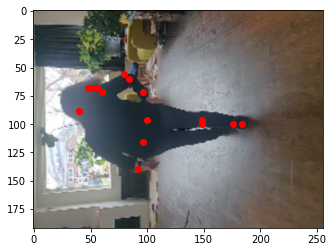

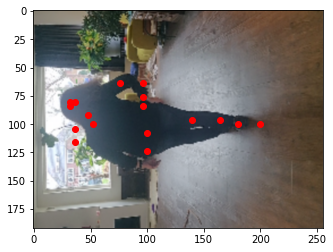

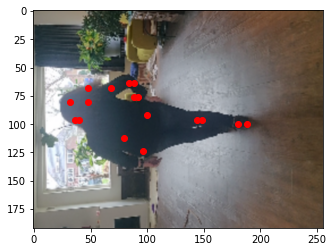

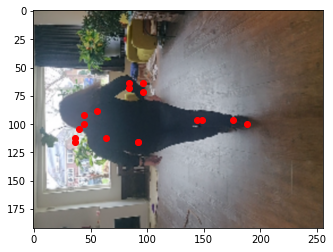

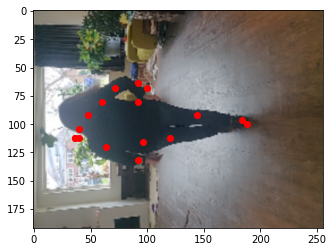

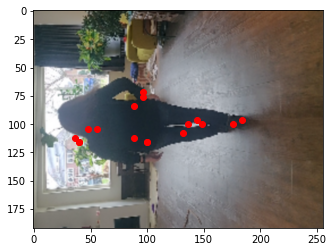

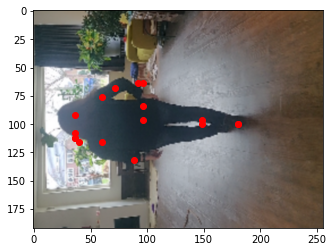

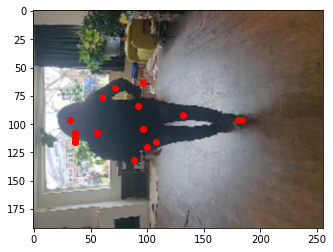

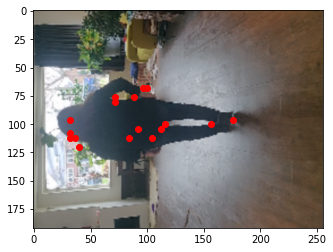

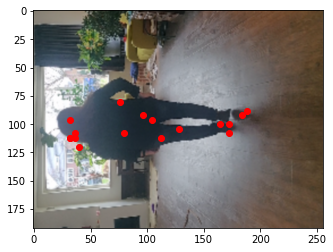

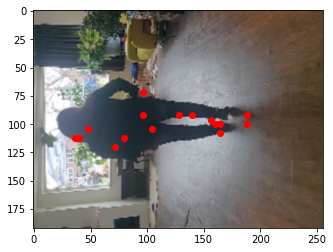

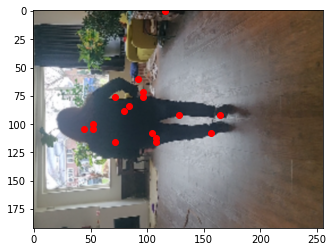

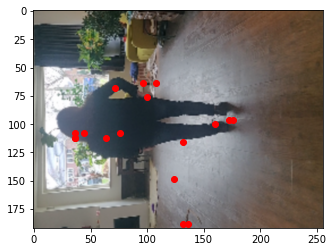

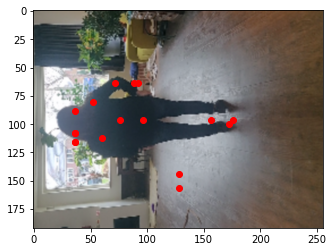

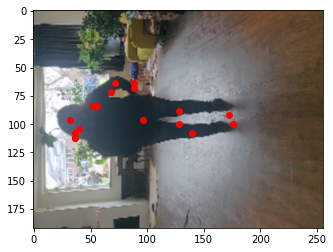

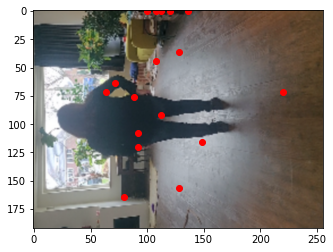

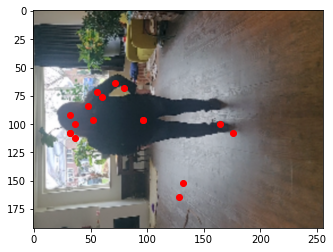

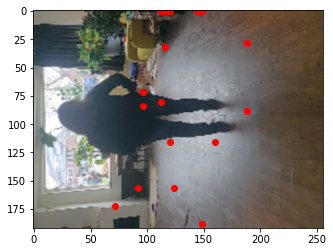

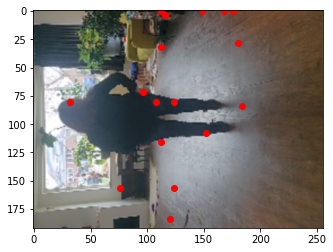

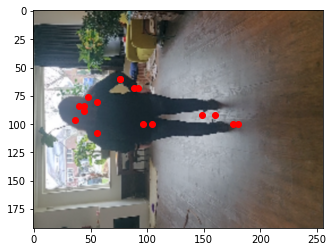

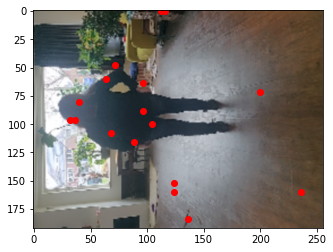

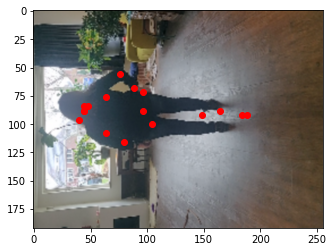

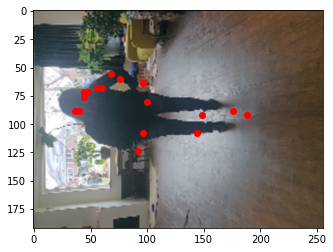

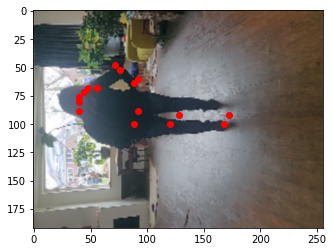

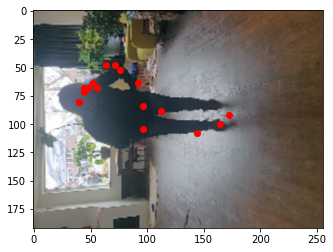

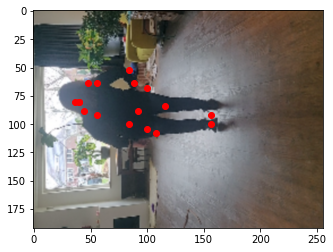

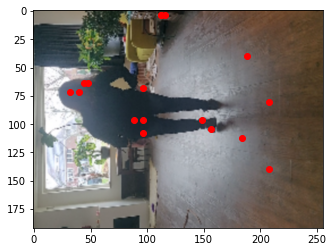

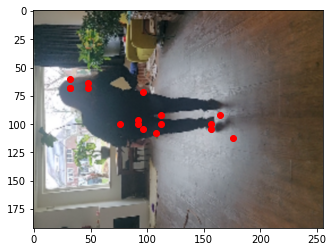

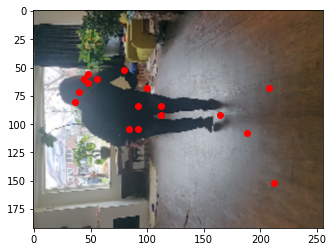

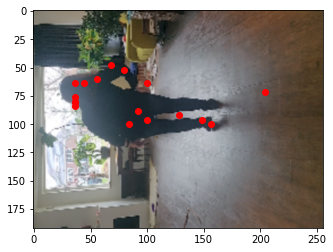

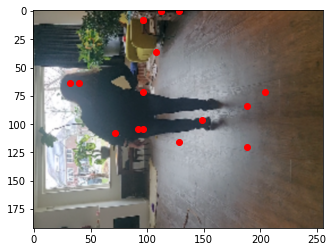

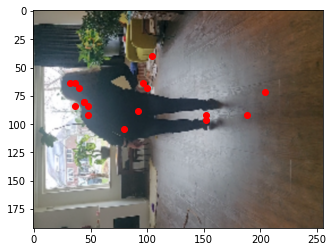

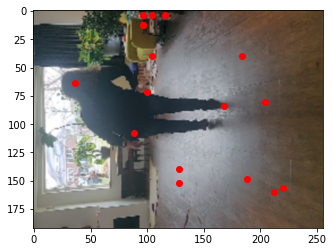

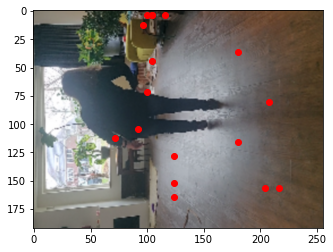

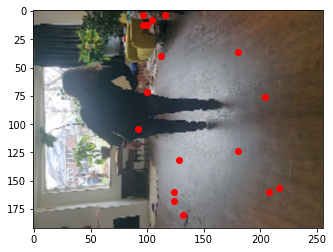

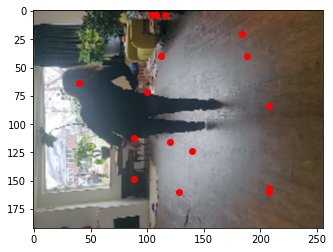

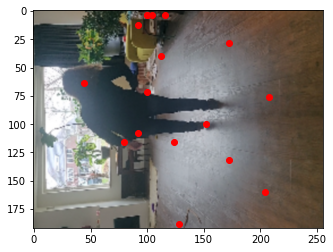

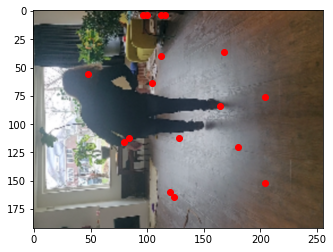

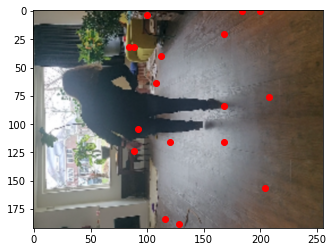

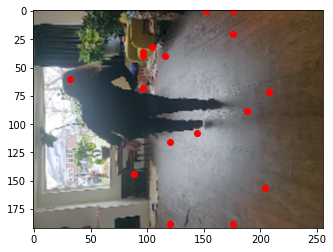

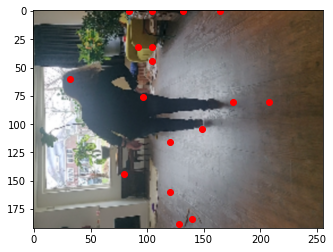

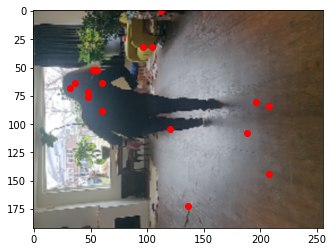

<Figure size 432x288 with 0 Axes>

In [7]:
import motion
from motion import config
 
def get_video_array(video_dir):

    cap = cv2.VideoCapture(video_dir)
    print(int(cap.get(cv2.CAP_PROP_FPS)))
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty(
        (frameCount, config.resize["width"],config.resize["height"], 3),
        np.dtype("uint8"),
    )

    fc = 0
    ret = True
    plt.figure()
    plt.ion()
    while fc < frameCount and ret:
        ret, a = cap.read(cv2.IMREAD_COLOR)
        b = data_resize(a)
        buf[fc] = b
        fc += 1
    
    cap.release()
    return buf


def data_resize(data_array):
    return cv2.resize(data_array, ( config.resize["height"],config.resize["width"]))


def main(video_dir):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name
    array = get_video_array(video_dir)
    pred = motion.get_pose(array)

    images = motion.plot_pose(array,pred)    
    print(images)
    make_video(images,"output/marked.mp4")
    
main('coco/divera_trend.mp4')